# Plots for Vis Example Section of BB Paper

In [21]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function
import os
import six.moves.cPickle as pkl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator, ScalarFormatter
#from bb.tools.hist_tools_modified import hist, poisson_error
from skhep.visual import MplPlotter as skh_plt
from astropy.stats import knuth_bin_width
from utilities import rough, err_nn, err_li
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

## Drell Yan Plots

In [23]:
bb_dir = os.path.join('/Users/brianpollack/Coding/BayesianBlocks')
xlims = (50, 140)
ratlims = (0, 2.5)
n_events = 10000

z_data = pd.read_pickle(bb_dir+'/files/DY/ZLL_v2.p')
z_data = z_data.query('50<Mll<140')
data_shifted = z_data[0:n_events].Mll.values*1.01
mc_nominal = z_data[n_events:].Mll.values

In [31]:
z_data.shape

(689778, 14)

Text(0.3,0.4,'$\\hat{R}$=8.707e-03\nENN=9.789e+03\nELI=2.903e+03')

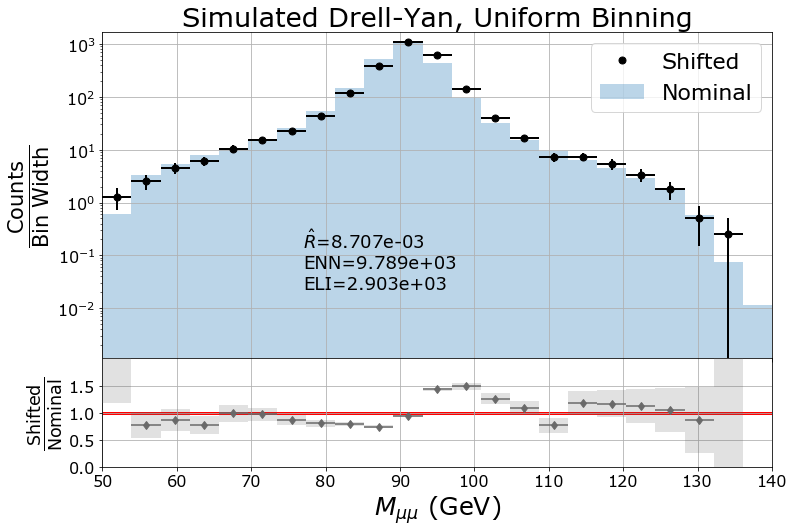

In [26]:
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=23
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Uniform Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')


In [20]:
eli(data_shifted, hist1)

[(66.1818127577472, 65.08308907515726), (76.0703259010565, 76.42126029991653), (78.26777326623635, 77.65912860669566), (80.4652206314162, 80.62834192884688), (81.19770308647615, 80.83152202273288), (81.93018554153609, 81.05223549079307), (82.66266799659604, 82.32348775719053), (82.66266799659604, 83.11399761564729), (84.8601153617759, 83.97785793740954), (84.8601153617759, 85.0027362710968), (85.59259781683585, 85.99890478224339), (86.3250802718958, 86.18688165724689), (87.05756272695575, 86.631518200769), (87.05756272695575, 87.06716041450566), (87.33224364760324, 87.53571446353656), (87.60692456825072, 87.72314623451301), (87.88160548889819, 88.4187936497214), (88.15628640954567, 88.46368452988567), (88.43096733019316, 88.66832569593045), (88.70564825084062, 88.71971332800733), (88.98032917148811, 88.73534206985735), (89.25501009213559, 89.05191120909352), (89.25501009213559, 89.45525070996038), (89.37709050131225, 89.60679033427263), (89.49917091048891, 89.63664710962364), (89.62125

27.046827754593494

[5.000e+00 1.000e+01 1.800e+01 2.400e+01 4.100e+01 6.100e+01 8.800e+01
 1.680e+02 4.630e+02 1.524e+03 4.248e+03 2.474e+03 5.520e+02 1.570e+02
 6.600e+01 2.800e+01 2.900e+01 2.100e+01 1.300e+01 7.000e+00 2.000e+00
 1.000e+00 0.000e+00]
[435. 435. 435. 434. 435. 435. 435. 434. 435. 435. 435. 434. 435. 435.
 435. 434. 435. 435. 435. 434. 435. 435. 435.]


ValueError: operands could not be broadcast together with shapes (9997,) (10000,) 

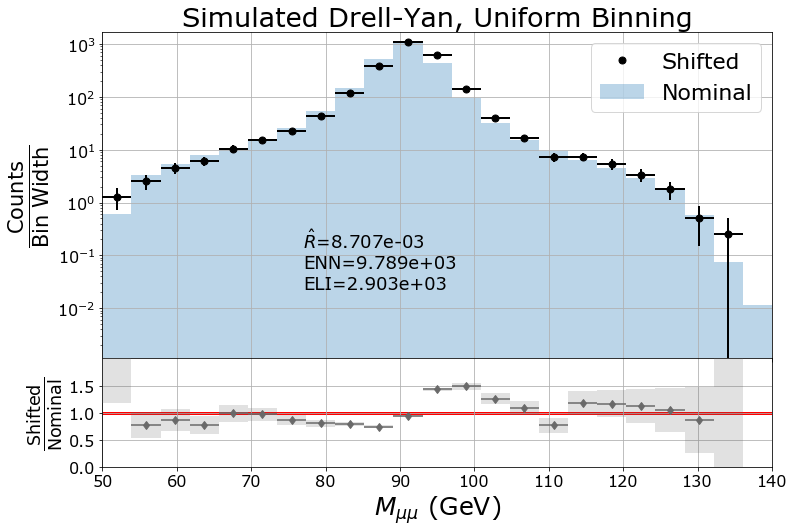

<Figure size 864x576 with 0 Axes>

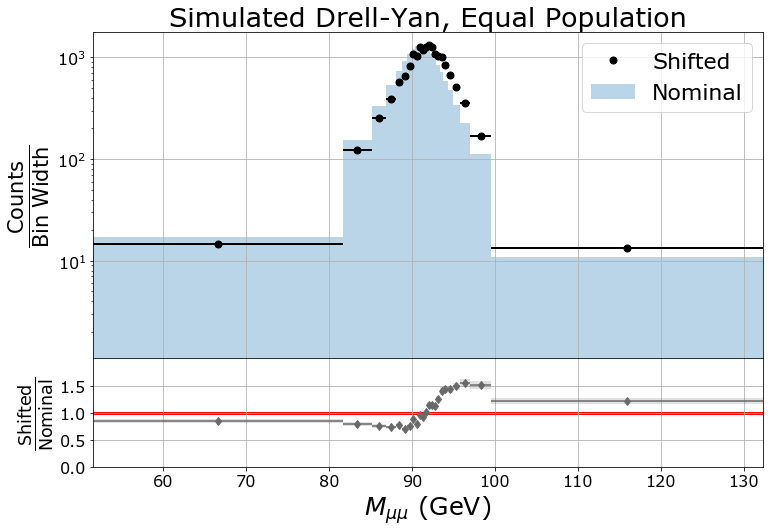

In [28]:
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=23
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Uniform Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')
plt.savefig(bb_dir+'/plots/vis_examples/b23_Z_shifted.pdf')

plt.figure()
_, bep = pd.qcut(data_shifted, 23, retbins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=bep
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Equal Population', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')
plt.savefig(bb_dir+'/plots/vis_examples/bep_Z_shifted.pdf')


plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins='blocks'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Bayesian Blocks', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')
plt.savefig(bb_dir+'/plots/vis_examples/bb_Z_shifted.pdf')

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins='scott'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Scott Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')
plt.savefig(bb_dir+'/plots/vis_examples/bscott_Z_shifted.pdf')

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins='fd'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Freedman Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')
plt.savefig(bb_dir+'/plots/vis_examples/bfd_Z_shifted.pdf')

plt.figure()
_, bk = knuth_bin_width(data_shifted, return_bins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=bk
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Knuth Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')
plt.savefig(bb_dir+'/plots/vis_examples/bk_Z_shifted.pdf')

Text(0.3,0.4,'$\\hat{R}$=2.287e-03\nENN=3.416e+03\nELI=3.898e+02')

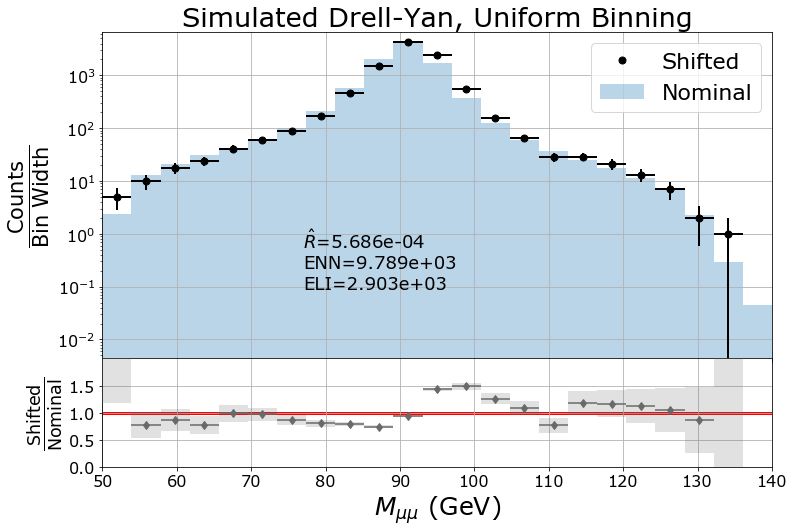

<Figure size 864x576 with 0 Axes>

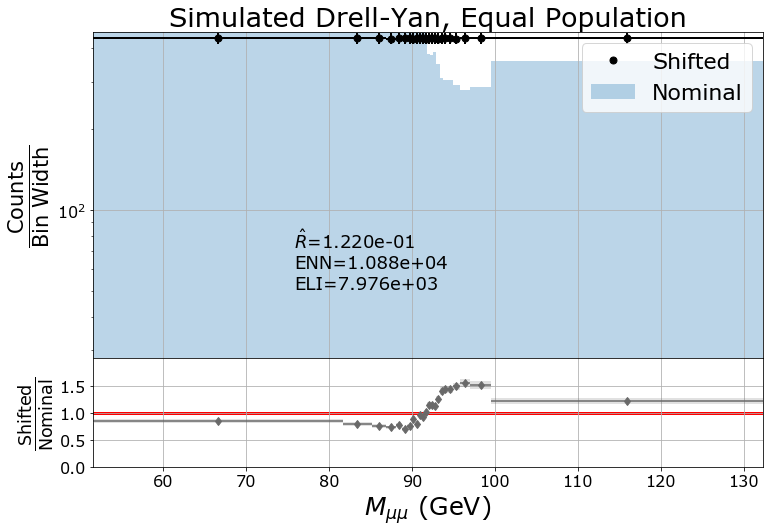

<Figure size 864x576 with 0 Axes>

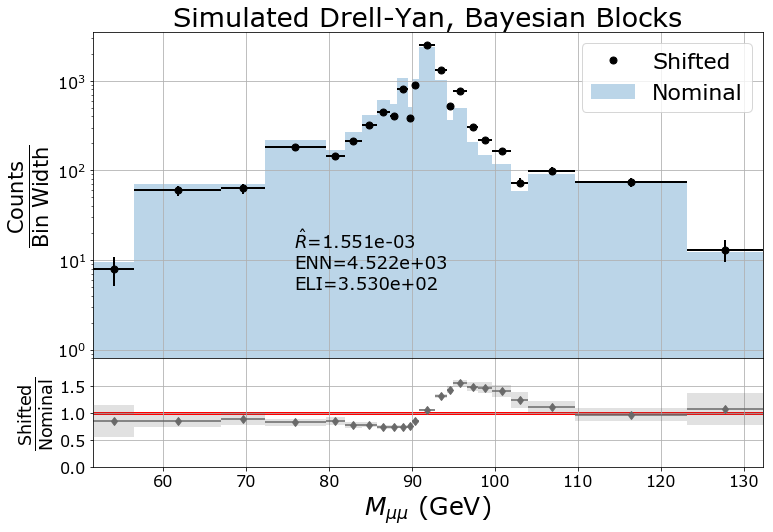

<Figure size 864x576 with 0 Axes>

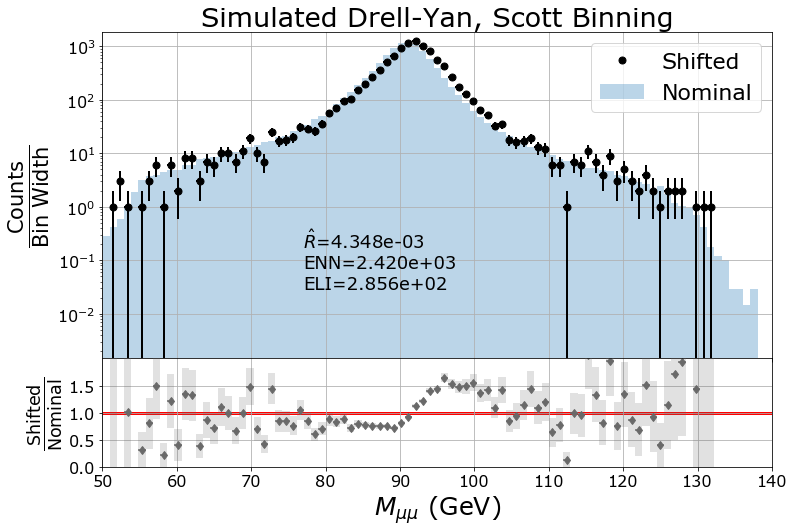

<Figure size 864x576 with 0 Axes>

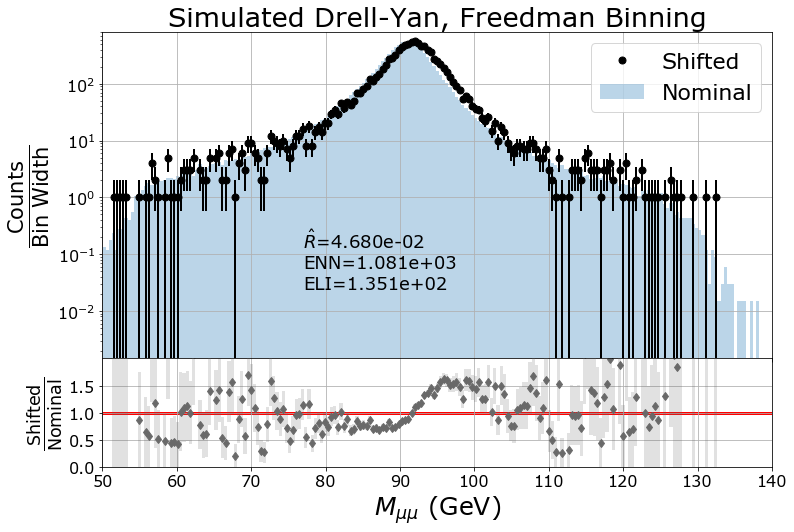

<Figure size 864x576 with 0 Axes>

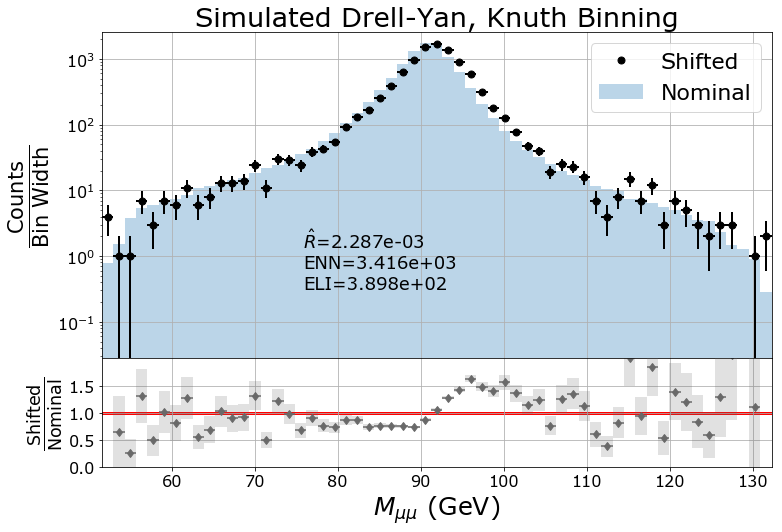

In [30]:
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins=23
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Uniform Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
_, bep = pd.qcut(data_shifted, 23, retbins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins=bep
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Equal Population', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')


plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins='blocks'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Bayesian Blocks', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins='scott'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Scott Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins='fd'
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Freedman Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

plt.figure()
_, bk = knuth_bin_width(data_shifted, return_bins=True)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True,  err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, ),
    range=xlims, bins=bk
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Knuth Binning', fontsize=27)
r = rough(hist1)
enn = err_nn(data_shifted, hist1)
eli = err_li(data_shifted, hist1)
axes[0].text(0.3, 0.4, f'$\hat{{R}}$={r:.3e}\nENN={enn:.3e}\nELI={eli:.3e}', transform=axes[0].transAxes, fontsize=18,
        verticalalignment='top')

## Jet Pt Plots

In [123]:
pt_data = pd.read_pickle(bb_dir+'/files/DY/ZLL_Jet1.p')
pt_data = pt_data.query('0<leading_jet_pT<800').reset_index().ix[0:9000]
pt_mc = pd.read_pickle(bb_dir+'/files/DY/ZLL_Jet3.p')
pt_mc = pt_mc.query('0<leading_jet_pT<800')
xlims = (pt_data.leading_jet_pT.min(), pt_data.leading_jet_pT.max())
ratlims = (0, 2.5)
n_events = len(pt_data)

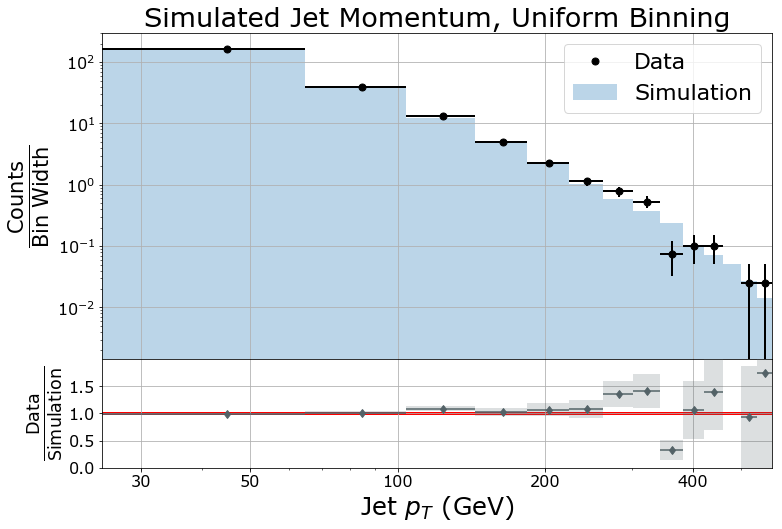

In [126]:
axes, hist1, hist2 = ratio_plot(
    dict(x=pt_data.leading_jet_pT.values,histtype='marker', markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=pt_mc.leading_jet_pT.values, weights=[n_events/len(pt_mc)]*(len(pt_mc)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims, bins=14, logx=True
)

axes[0].set_xticks([30, 50, 100, 200, 400])
axes[0].get_xaxis().set_major_formatter(ScalarFormatter())
axes[1].set_xticks([30, 50, 100, 200, 400])
axes[1].get_xaxis().set_major_formatter(ScalarFormatter())

axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Data}{Simulation}}$', fontsize=25)

axes[1].set_xlabel(r'Jet $p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Jet Momentum, Uniform Binning', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/b14_Jet_comp.pdf')

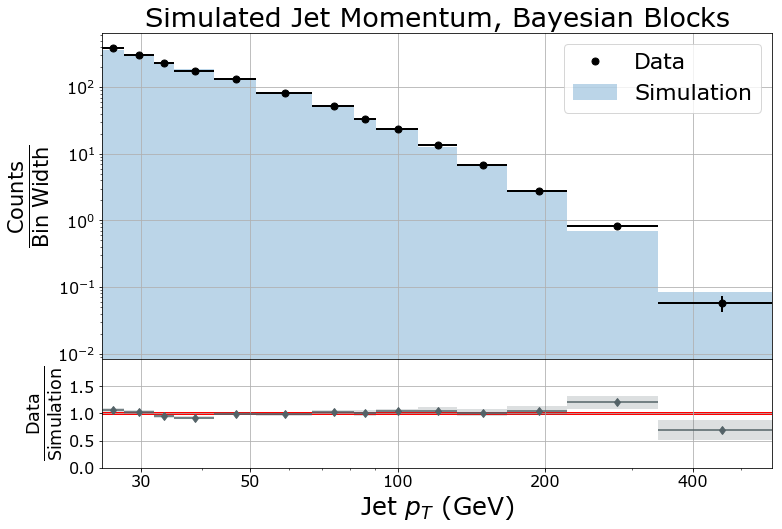

In [127]:
axes, hist1, hist2 = ratio_plot(
    dict(x=pt_data.leading_jet_pT.values,histtype='marker', markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian', p0=0.01),
    dict(x=pt_mc.leading_jet_pT.values, weights=[n_events/len(pt_mc)]*(len(pt_mc)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims, bins='blocks', logx=True
)

axes[0].set_xticks([30, 50, 100, 200, 400])
axes[0].get_xaxis().set_major_formatter(ScalarFormatter())
axes[1].set_xticks([30, 50, 100, 200, 400])
axes[1].get_xaxis().set_major_formatter(ScalarFormatter())

axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Data}{Simulation}}$', fontsize=25)

axes[1].set_xlabel(r'Jet $p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Jet Momentum, Bayesian Blocks', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/bb_Jet_comp.pdf')

In [9]:
data_shifted

array([91.63746656, 89.45525071, 91.71762227, ..., 93.89197135,
       95.10807446, 88.530117  ])

In [12]:
df = pd.Series(data_shifted)
df.qcut(23)

AttributeError: 'Series' object has no attribute 'qcut'

In [25]:
b = pd.qcut(data_shifted, 23, retbins=True)

In [28]:
b[1]

array([ 51.59669763,  81.6308449 ,  85.19306532,  86.90463598,
        88.01330875,  88.77226882,  89.43342752,  89.96688421,
        90.37227773,  90.79581444,  91.140509  ,  91.50808658,
        91.85218264,  92.17802601,  92.52454998,  92.92511824,
        93.34210886,  93.77349432,  94.28672389,  94.92831958,
        95.78392958,  97.01319109,  99.57052659, 132.2503499 ])